In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Select a subset (at least 1000 images)
subset_size = 1000
x_subset, y_subset = x_train[:subset_size], y_train[:subset_size]

# Normalize pixel values to be between 0 and 1
x_subset = x_subset / 255.0

# Reshape the images to (28, 28, 1) to match the input shape of a convolutional neural network
x_subset = x_subset.reshape((subset_size, 28, 28, 1))

# Convert labels to one-hot encoding
y_subset = tf.keras.utils.to_categorical(y_subset, 10)

# Display the shapes of the loaded data
print("Shape of x_subset:", x_subset.shape)
print("Shape of y_subset:", y_subset.shape)


Shape of x_subset: (1000, 28, 28, 1)
Shape of y_subset: (1000, 10)


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Select a subset (at least 1000 images)
subset_size = 1000
x_subset, y_subset = x_train[:subset_size], y_train[:subset_size]

# Normalize pixel values to be between 0 and 1
x_subset = x_subset / 255.0

# Reshape the images to (28, 28, 1) to match the input shape of a convolutional neural network
x_subset = x_subset.reshape((subset_size, 28, 28, 1))

# Convert labels to one-hot encoding
y_subset = tf.keras.utils.to_categorical(y_subset, 10)

# Apply data augmentation (optional)
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

# Fit the data augmentation generator on the training data
datagen.fit(x_subset)

# Apply data augmentation to the images
augmented_images = next(datagen.flow(x_subset, shuffle=False))

# Display the shapes of the loaded data and augmented data
print("Shape of x_subset:", x_subset.shape)
print("Shape of y_subset:", y_subset.shape)
print("Shape of augmented_images:", augmented_images.shape)


Shape of x_subset: (1000, 28, 28, 1)
Shape of y_subset: (1000, 10)
Shape of augmented_images: (32, 28, 28, 1)


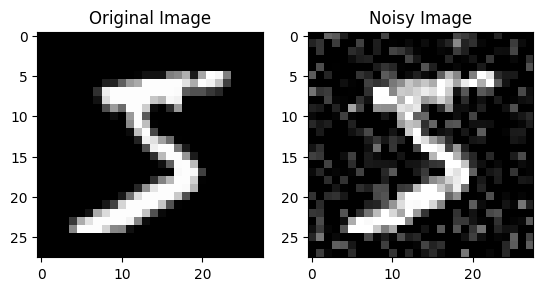

In [ ]:
import numpy as np



# Define a function to add random noise to images
def add_noise(images, noise_factor=0.2):
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    noisy_images = np.clip(noisy_images, 0.0, 1.0)  # Clip values to be in the range [0, 1]
    return noisy_images

# Generate noisy version of the subset
noise_factor = 0.2  # Adjust the noise factor as needed
noisy_x_subset = add_noise(x_subset, noise_factor)

# Display an example of original and noisy images
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.imshow(x_subset[0].reshape(28, 28), cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(noisy_x_subset[0].reshape(28, 28), cmap='gray')
plt.title('Noisy Image')

plt.show()


Epoch 1/10
25/25 [==============================] - 7s 116ms/step - loss: 0.4747 - val_loss: 0.2845
Epoch 2/10
25/25 [==============================] - 2s 99ms/step - loss: 0.2001 - val_loss: 0.1622
Epoch 3/10
25/25 [==============================] - 3s 112ms/step - loss: 0.1430 - val_loss: 0.1352
Epoch 4/10
25/25 [==============================] - 4s 174ms/step - loss: 0.1244 - val_loss: 0.1184
Epoch 5/10
25/25 [==============================] - 3s 111ms/step - loss: 0.1134 - val_loss: 0.1080
Epoch 6/10
25/25 [==============================] - 2s 94ms/step - loss: 0.1049 - val_loss: 0.1012
Epoch 7/10
25/25 [==============================] - 2s 94ms/step - loss: 0.0990 - val_loss: 0.0959
Epoch 8/10
25/25 [==============================] - 2s 92ms/step - loss: 0.0963 - val_loss: 0.0928
Epoch 9/10
25/25 [==============================] - 4s 154ms/step - loss: 0.0928 - val_loss: 0.0904
Epoch 10/10
32/32 [==============================] - 1s 24ms/step - loss: 0.0893
Autoencoder Loss: 0.089

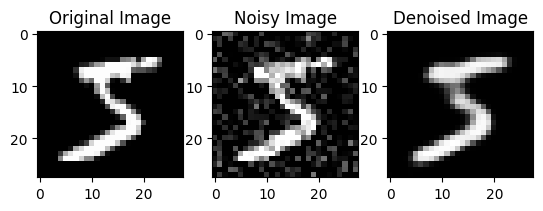

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model



# Define the autoencoder architecture
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder using the noisy images as input and the clean images as target
autoencoder.fit(noisy_x_subset, x_subset, epochs=10, batch_size=32, shuffle=True, validation_split=0.2)

# Evaluate the model
loss = autoencoder.evaluate(noisy_x_subset, x_subset)
print("Autoencoder Loss:", loss)

# Use the autoencoder to denoise a sample
denoised_images = autoencoder.predict(noisy_x_subset)

# Display an example of original, noisy, and denoised images
import matplotlib.pyplot as plt

plt.subplot(1, 3, 1)
plt.imshow(x_subset[0].reshape(28, 28), cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(noisy_x_subset[0].reshape(28, 28), cmap='gray')
plt.title('Noisy Image')

plt.subplot(1, 3, 3)
plt.imshow(denoised_images[0].reshape(28, 28), cmap='gray')
plt.title('Denoised Image')

plt.show()


Epoch 1/100
25/25 [==============================] - 5s 173ms/step - loss: 0.4976 - val_loss: 0.3196
Epoch 2/100
25/25 [==============================] - 3s 106ms/step - loss: 0.2128 - val_loss: 0.1752
Epoch 3/100
25/25 [==============================] - 3s 101ms/step - loss: 0.1518 - val_loss: 0.1378
Epoch 4/100
25/25 [==============================] - 2s 100ms/step - loss: 0.1281 - val_loss: 0.1207
Epoch 5/100
25/25 [==============================] - 2s 90ms/step - loss: 0.1150 - val_loss: 0.1090
Epoch 6/100
25/25 [==============================] - 3s 132ms/step - loss: 0.1064 - val_loss: 0.1015
Epoch 7/100
25/25 [==============================] - 3s 100ms/step - loss: 0.1003 - val_loss: 0.0971
Epoch 8/100
25/25 [==============================] - 2s 91ms/step - loss: 0.0966 - val_loss: 0.0937
Epoch 9/100
25/25 [==============================] - 2s 95ms/step - loss: 0.0940 - val_loss: 0.0923
Epoch 10/100
25/25 [==============================] - 2s 92ms/step - loss: 0.0942 - val_loss: 

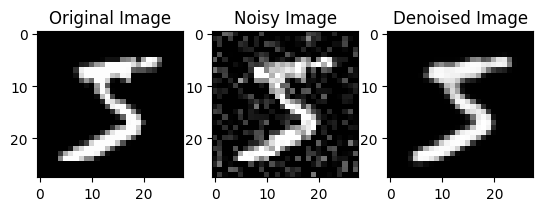

In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping



# Define the autoencoder architecture
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model with binary crossentropy loss
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Set up early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the autoencoder using the noisy images as input and the clean images as target
history = autoencoder.fit(
    noisy_x_subset, x_subset,
    epochs=100,
    batch_size=32,
    shuffle=True,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Evaluate the model
loss = autoencoder.evaluate(noisy_x_subset, x_subset)
print("Autoencoder Loss:", loss)

# Use the autoencoder to denoise a sample
denoised_images = autoencoder.predict(noisy_x_subset)

# Display an example of original, noisy, and denoised images
import matplotlib.pyplot as plt

plt.subplot(1, 3, 1)
plt.imshow(x_subset[0].reshape(28, 28), cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(noisy_x_subset[0].reshape(28, 28), cmap='gray')
plt.title('Noisy Image')

plt.subplot(1, 3, 3)
plt.imshow(denoised_images[0].reshape(28, 28), cmap='gray')
plt.title('Denoised Image')

plt.show()


313/313 [==============================] - 7s 23ms/step


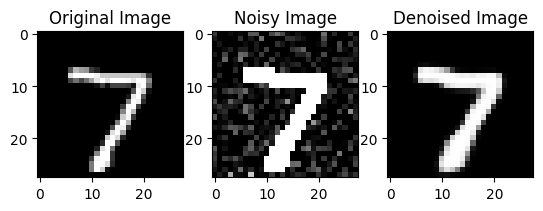

In [9]:


# Generate noisy version of the test set
noisy_x_test = add_noise(x_test, noise_factor)

# Reshape the test sets to have a fourth dimension (channels)
noisy_x_test = noisy_x_test.reshape((len(noisy_x_test), 28, 28, 1))

# Use the trained autoencoder to denoise the test set
denoised_x_test = autoencoder.predict(noisy_x_test)

# Display an example of original, noisy, and denoised test images
import matplotlib.pyplot as plt

index = 0  # Change this index to visualize a different sample

plt.subplot(1, 3, 1)
plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(noisy_x_test[index].reshape(28, 28), cmap='gray')
plt.title('Noisy Image')

plt.subplot(1, 3, 3)
plt.imshow(denoised_x_test[index].reshape(28, 28), cmap='gray')
plt.title('Denoised Image')

plt.show()


313/313 [==============================] - 9s 29ms/step


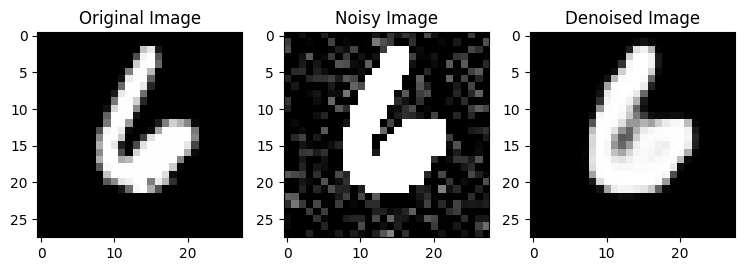

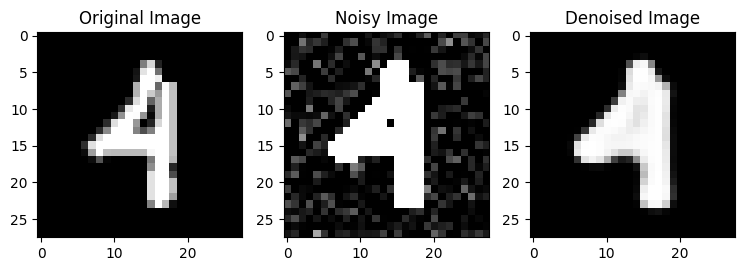

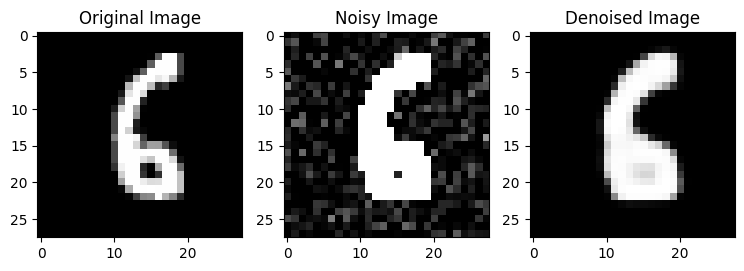

In [10]:


# Generate noisy version of the test set
noisy_x_test = add_noise(x_test, noise_factor)

# Reshape the test sets to have a fourth dimension (channels)
noisy_x_test = noisy_x_test.reshape((len(noisy_x_test), 28, 28, 1))

# Use the trained autoencoder to denoise the test set
denoised_x_test = autoencoder.predict(noisy_x_test)

# Display a few examples of original, noisy, and denoised test images
import matplotlib.pyplot as plt
import random

# Choose random indices for visualization
sample_indices = random.sample(range(len(x_test)), 3)

for idx in sample_indices:
    plt.figure(figsize=(9, 3))

    plt.subplot(1, 3, 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(noisy_x_test[idx].reshape(28, 28), cmap='gray')
    plt.title('Noisy Image')

    plt.subplot(1, 3, 3)
    plt.imshow(denoised_x_test[idx].reshape(28, 28), cmap='gray')
    plt.title('Denoised Image')

    plt.show()


In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Load the NAB datasets (replace the paths with your actual file paths)
normal_data_path = '/content/art_daily_small_noise.csv'
abnormal_data_path = '/content/art_daily_jumpsup.csv'

# Load the datasets
normal_data_df = pd.read_csv(normal_data_path)
abnormal_data_df = pd.read_csv(abnormal_data_path)

# Extract the time series values
normal_data = normal_data_df['value'].values
abnormal_data = abnormal_data_df['value'].values

# Normalize the data
normal_data = (normal_data - np.mean(normal_data)) / np.std(normal_data)
abnormal_data = (abnormal_data - np.mean(abnormal_data)) / np.std(abnormal_data)

# Create the autoencoder architecture
input_dim = 1  # Number of features in each time step (1 for univariate time series)
encoding_dim = 5  # Number of features in the encoded representation

input_data = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_data)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_data, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')  # Using Mean Squared Error as the loss function

# Train the autoencoder on normal data
autoencoder.fit(normal_data, normal_data, epochs=50, batch_size=32, shuffle=True, validation_split=0.2)

# Evaluate the model on normal data
normal_data_reconstructed = autoencoder.predict(normal_data)
mse_normal = np.mean(np.square(normal_data - normal_data_reconstructed))

# Evaluate the model on abnormal data
abnormal_data_reconstructed = autoencoder.predict(abnormal_data)
mse_abnormal = np.mean(np.square(abnormal_data - abnormal_data_reconstructed))

# Define a threshold for anomaly detection based on training data
threshold = mse_normal + 2 * np.std(mse_normal)

# Detect anomalies in a new set of data (you can use normal or abnormal for testing)
new_data = normal_data  # Replace with the data you want to test
new_data_reconstructed = autoencoder.predict(new_data)
mse_new = np.mean(np.square(new_data - new_data_reconstructed))

# Determine if samples are normal or abnormal based on the threshold
is_abnormal = mse_new > threshold

# Print results
print(f'Mean Squared Error (MSE) for normal data: {mse_normal}')
print(f'Mean Squared Error (MSE) for abnormal data: {mse_abnormal}')
print(f'MSE for new data: {mse_new}')
print(f'Detected anomalies: {is_abnormal}')


Epoch 1/50
101/101 [==============================] - 1s 5ms/step - loss: 1.1162 - val_loss: 1.0375
Epoch 2/50
101/101 [==============================] - 0s 4ms/step - loss: 1.0469 - val_loss: 0.9740
Epoch 3/50
101/101 [==============================] - 0s 4ms/step - loss: 0.9892 - val_loss: 0.9226
Epoch 4/50
101/101 [==============================] - 0s 4ms/step - loss: 0.9417 - val_loss: 0.8804
Epoch 5/50
101/101 [==============================] - 0s 3ms/step - loss: 0.9012 - val_loss: 0.8440
Epoch 6/50
101/101 [==============================] - 0s 3ms/step - loss: 0.8654 - val_loss: 0.8115
Epoch 7/50
101/101 [==============================] - 0s 3ms/step - loss: 0.8330 - val_loss: 0.7822
Epoch 8/50
101/101 [==============================] - 0s 3ms/step - loss: 0.8035 - val_loss: 0.7552
Epoch 9/50
101/101 [==============================] - 0s 3ms/step - loss: 0.7765 - val_loss: 0.7307
Epoch 10/50
101/101 [==============================] - 0s 3ms/step - loss: 0.7518 - val_loss: 0.7082

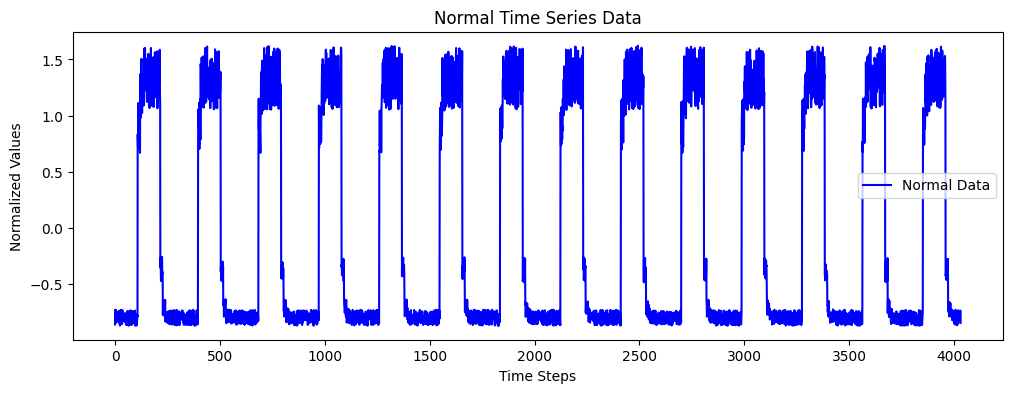

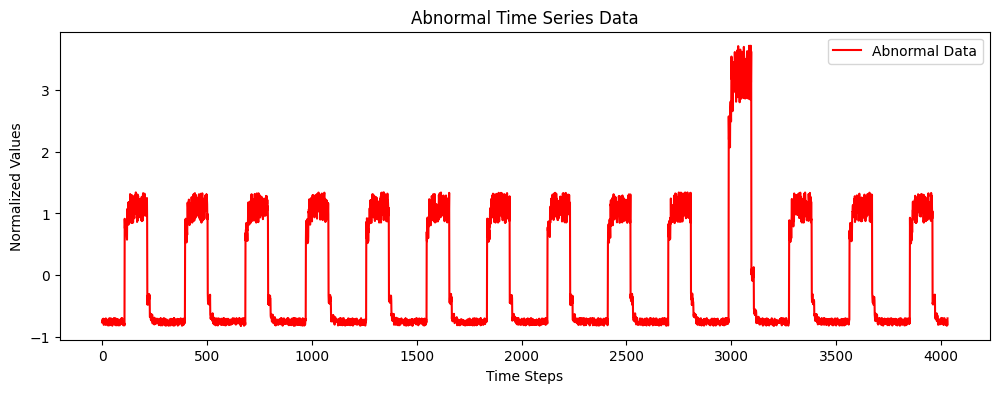

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the NAB datasets (replace the paths with your actual file paths)
normal_data_path = '/content/art_daily_small_noise.csv'
abnormal_data_path = '/content/art_daily_jumpsup.csv'

# Load the datasets
normal_data_df = pd.read_csv(normal_data_path)
abnormal_data_df = pd.read_csv(abnormal_data_path)

# Extract the time series values
normal_data = normal_data_df['value'].values
abnormal_data = abnormal_data_df['value'].values

# Normalize the data
normal_data = (normal_data - np.mean(normal_data)) / np.std(normal_data)
abnormal_data = (abnormal_data - np.mean(abnormal_data)) / np.std(abnormal_data)

# Visualize normal data
plt.figure(figsize=(12, 4))
plt.plot(normal_data, label='Normal Data', color='blue')
plt.title('Normal Time Series Data')
plt.xlabel('Time Steps')
plt.ylabel('Normalized Values')
plt.legend()
plt.show()

# Visualize abnormal data
plt.figure(figsize=(12, 4))
plt.plot(abnormal_data, label='Abnormal Data', color='red')
plt.title('Abnormal Time Series Data')
plt.xlabel('Time Steps')
plt.ylabel('Normalized Values')
plt.legend()
plt.show()


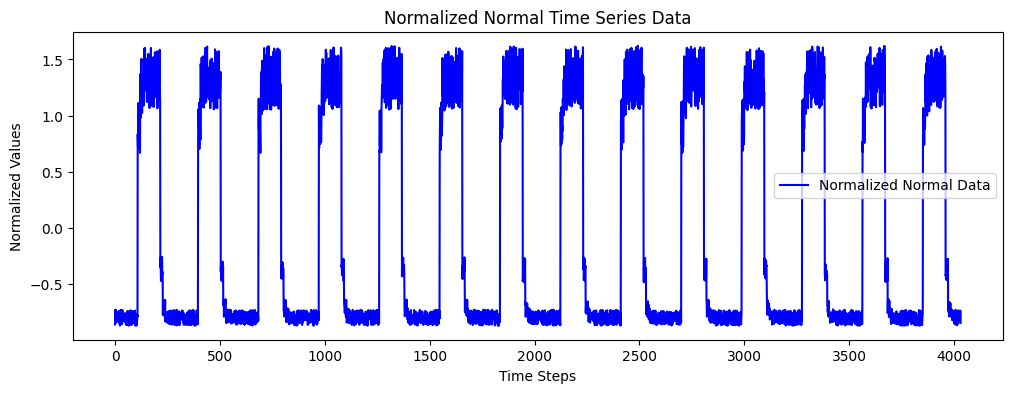

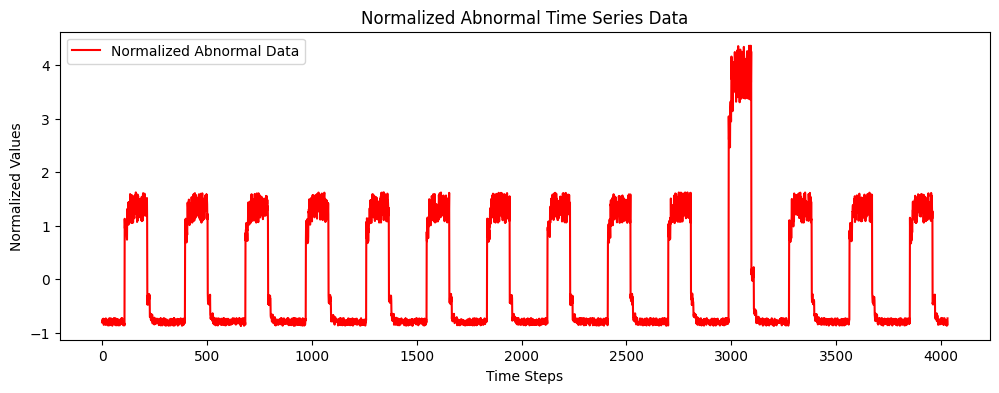

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the NAB datasets (replace the paths with your actual file paths)
normal_data_path = '/content/art_daily_small_noise.csv'
abnormal_data_path = '/content/art_daily_jumpsup.csv'

# Load the datasets
normal_data_df = pd.read_csv(normal_data_path)
abnormal_data_df = pd.read_csv(abnormal_data_path)

# Extract the time series values
normal_data = normal_data_df['value'].values
abnormal_data = abnormal_data_df['value'].values

# Normalize the normal data and save mean and std for later use
mean_normal = np.mean(normal_data)
std_normal = np.std(normal_data)

normal_data_normalized = (normal_data - mean_normal) / std_normal
abnormal_data_normalized = (abnormal_data - mean_normal) / std_normal

# Visualize normalized normal data
plt.figure(figsize=(12, 4))
plt.plot(normal_data_normalized, label='Normalized Normal Data', color='blue')
plt.title('Normalized Normal Time Series Data')
plt.xlabel('Time Steps')
plt.ylabel('Normalized Values')
plt.legend()
plt.show()

# Visualize normalized abnormal data
plt.figure(figsize=(12, 4))
plt.plot(abnormal_data_normalized, label='Normalized Abnormal Data', color='red')
plt.title('Normalized Abnormal Time Series Data')
plt.xlabel('Time Steps')
plt.ylabel('Normalized Values')
plt.legend()
plt.show()


Number of normal subsequences: 3733
Shape of each subsequence: (300,)


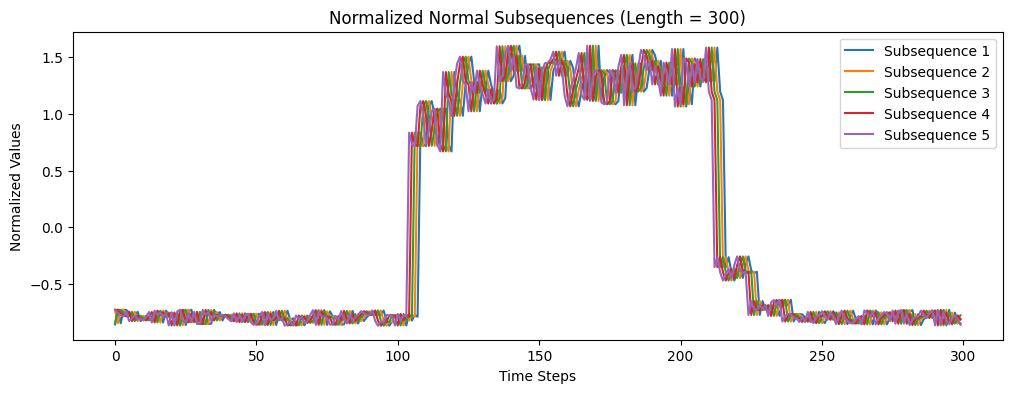

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the NAB datasets (replace the paths with your actual file paths)
normal_data_path = '/content/art_daily_small_noise.csv'
abnormal_data_path = '/content/art_daily_jumpsup.csv'

# Load the datasets
normal_data_df = pd.read_csv(normal_data_path)
abnormal_data_df = pd.read_csv(abnormal_data_path)

# Extract the time series values
normal_data = normal_data_df['value'].values
abnormal_data = abnormal_data_df['value'].values

# Normalize the normal data and save mean and std for later use
mean_normal = np.mean(normal_data)
std_normal = np.std(normal_data)

normal_data_normalized = (normal_data - mean_normal) / std_normal
abnormal_data_normalized = (abnormal_data - mean_normal) / std_normal

# Function to create subsequences with a sliding window
def create_subsequences(data, sequence_length):
    subsequences = []
    for i in range(0, len(data) - sequence_length + 1):
        subsequence = data[i:i+sequence_length]
        subsequences.append(subsequence)
    return np.array(subsequences)

# Create subsequences for normal data
sequence_length = 300
normal_subsequences = create_subsequences(normal_data_normalized, sequence_length)

# Print the number of subsequences and their shape
print(f"Number of normal subsequences: {len(normal_subsequences)}")
print(f"Shape of each subsequence: {normal_subsequences.shape[1:]}")

# Visualize a few subsequences
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.plot(normal_subsequences[i], label=f'Subsequence {i + 1}')

plt.title(f'Normalized Normal Subsequences (Length = {sequence_length})')
plt.xlabel('Time Steps')
plt.ylabel('Normalized Values')
plt.legend()
plt.show()


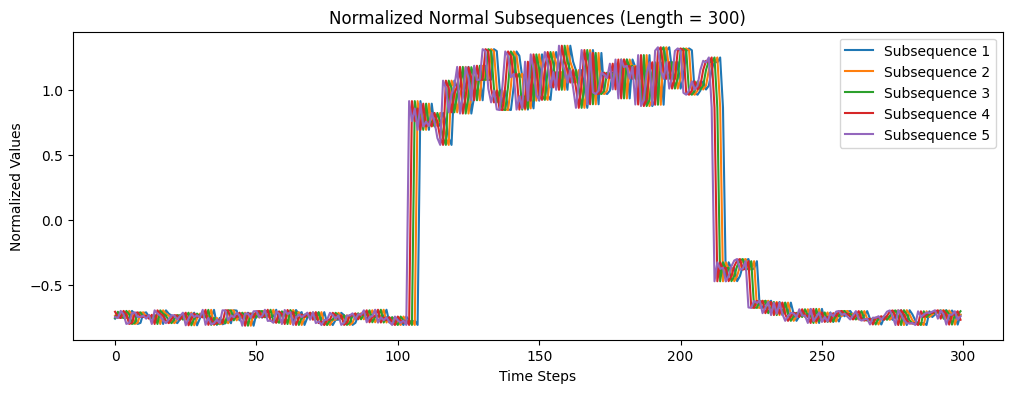

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the NAB datasets (replace the paths with your actual file paths)
normal_data_path = '/content/art_daily_jumpsup.csv'
abnormal_data_path = '/content/art_daily_small_noise.csv'

# Load the datasets
normal_data_df = pd.read_csv(normal_data_path)
abnormal_data_df = pd.read_csv(abnormal_data_path)

# Extract the time series values
normal_data = normal_data_df['value'].values
abnormal_data = abnormal_data_df['value'].values

# Normalize the normal data and save mean and std for later use
mean_normal = np.mean(normal_data)
std_normal = np.std(normal_data)

normal_data_normalized = (normal_data - mean_normal) / std_normal
abnormal_data_normalized = (abnormal_data - mean_normal) / std_normal

# Function to create subsequences with a sliding window
def create_subsequences(data, sequence_length):
    subsequences = []
    for i in range(0, len(data) - sequence_length + 1):
        subsequence = data[i:i+sequence_length]
        subsequences.append(subsequence)
    return np.array(subsequences)

# Create subsequences for normal data
sequence_length = 300
normal_subsequences = create_subsequences(normal_data_normalized, sequence_length)

# Visualize some subsequences
num_subsequences_to_visualize = 5
plt.figure(figsize=(12, 4))
for i in range(num_subsequences_to_visualize):
    plt.plot(normal_subsequences[i], label=f'Subsequence {i + 1}')

plt.title(f'Normalized Normal Subsequences (Length = {sequence_length})')
plt.xlabel('Time Steps')
plt.ylabel('Normalized Values')
plt.legend()
plt.show()


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load the NAB datasets (replace the paths with your actual file paths)
normal_data_path = '/content/art_daily_small_noise.csv'
abnormal_data_path = '/content/art_daily_jumpsup.csv'

# Load the datasets
normal_data_df = pd.read_csv(normal_data_path)
abnormal_data_df = pd.read_csv(abnormal_data_path)

# Extract the time series values
normal_data = normal_data_df['value'].values
abnormal_data = abnormal_data_df['value'].values

# Normalize the normal data and save mean and std for later use
mean_normal = np.mean(normal_data)
std_normal = np.std(normal_data)

normal_data_normalized = (normal_data - mean_normal) / std_normal
abnormal_data_normalized = (abnormal_data - mean_normal) / std_normal

# Function to create subsequences with a sliding window
def create_subsequences(data, sequence_length):
    subsequences = []
    for i in range(0, len(data) - sequence_length + 1):
        subsequence = data[i:i+sequence_length]
        subsequences.append(subsequence)
    return np.array(subsequences)

# Create subsequences for normal data
sequence_length = 300
normal_subsequences = create_subsequences(normal_data_normalized, sequence_length)

# Build the autoencoder model
input_data = Input(shape=(sequence_length, 1))  # Assuming univariate time series
x = Conv1D(64, 3, activation='relu', padding='same')(input_data)
x = MaxPooling1D(2, padding='same')(x)
x = Conv1D(32, 3, activation='relu', padding='same')(x)
encoded = MaxPooling1D(2, padding='same')(x)

x = Conv1D(32, 3, activation='relu', padding='same')(encoded)
x = UpSampling1D(2)(x)
x = Conv1D(64, 3, activation='relu', padding='same')(x)
x = UpSampling1D(2)(x)
decoded = Conv1D(1, 3, activation='sigmoid', padding='same')(x)

autoencoder = Model(input_data, decoded)

# Compile the model
optimizer = Adam(learning_rate=0.001)
autoencoder.compile(optimizer=optimizer, loss='mse')  # Using Mean Squared Error as the loss function

# Print the summary of the model
autoencoder.summary()


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 300, 1)]          0         
                                                                 
 conv1d (Conv1D)             (None, 300, 64)           256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 150, 64)           0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 150, 32)           6176      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 75, 32)            0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 75, 32)            3104

Epoch 1/50
27/27 [==============================] - 9s 132ms/step - loss: 0.7720 - val_loss: 0.4326
Epoch 2/50
27/27 [==============================] - 3s 119ms/step - loss: 0.4231 - val_loss: 0.4260
Epoch 3/50
27/27 [==============================] - 4s 166ms/step - loss: 0.4205 - val_loss: 0.4251
Epoch 4/50
27/27 [==============================] - 4s 133ms/step - loss: 0.4196 - val_loss: 0.4246
Epoch 5/50
27/27 [==============================] - 3s 115ms/step - loss: 0.4191 - val_loss: 0.4243
Epoch 6/50
27/27 [==============================] - 3s 114ms/step - loss: 0.4187 - val_loss: 0.4242
Epoch 7/50
27/27 [==============================] - 5s 174ms/step - loss: 0.4186 - val_loss: 0.4241
Epoch 8/50
27/27 [==============================] - 5s 199ms/step - loss: 0.4185 - val_loss: 0.4241
Epoch 9/50
27/27 [==============================] - 6s 222ms/step - loss: 0.4184 - val_loss: 0.4241
Epoch 10/50
27/27 [==============================] - 8s 287ms/step - loss: 0.4183 - val_loss: 0.4240

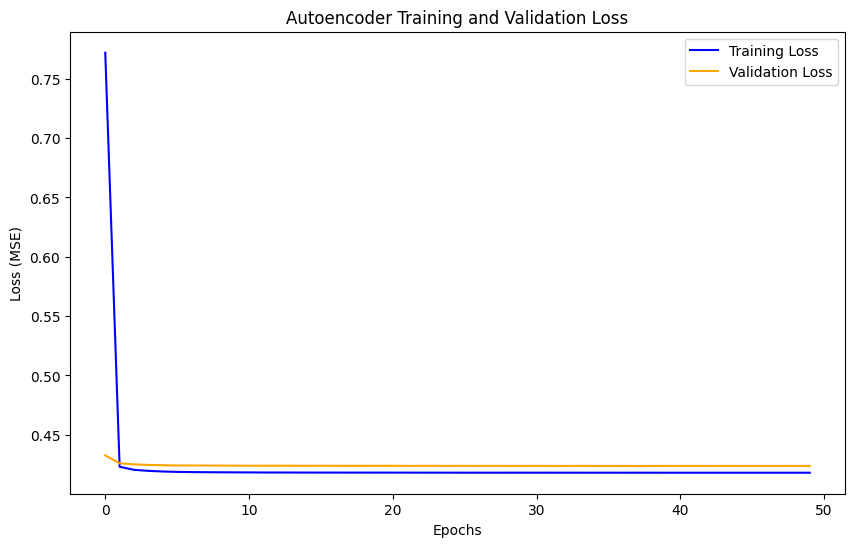

In [18]:
# Train the autoencoder on normal subsequences
epochs = 50
batch_size = 128

history = autoencoder.fit(
    normal_subsequences, normal_subsequences,
    epochs=epochs,
    batch_size=batch_size,
    shuffle=True,
    validation_split=0.1
)

# Plot the training and validation loss curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Autoencoder Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()


1/1 [==============================] - 0s 238ms/step


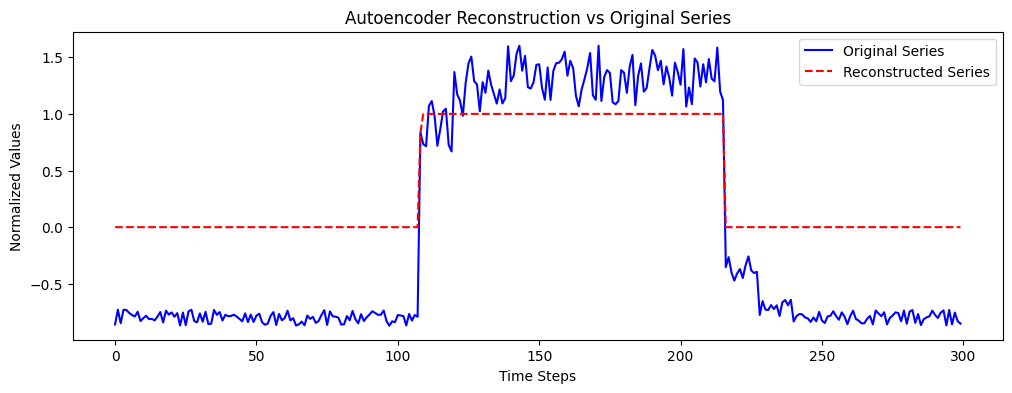

In [19]:
# Choose an index to visualize a specific subsequence
index_to_visualize = 0

# Get an example subsequence from normal data
example_subsequence = normal_subsequences[index_to_visualize]

# Reshape the subsequence to match the input shape of the model
example_subsequence = example_subsequence.reshape(1, sequence_length, 1)

# Use the trained autoencoder to reconstruct the subsequence
reconstructed_subsequence = autoencoder.predict(example_subsequence)

# Plot the original and reconstructed series
plt.figure(figsize=(12, 4))

plt.plot(example_subsequence[0], label='Original Series', color='blue')
plt.plot(reconstructed_subsequence[0], label='Reconstructed Series', color='red', linestyle='dashed')

plt.title('Autoencoder Reconstruction vs Original Series')
plt.xlabel('Time Steps')
plt.ylabel('Normalized Values')
plt.legend()
plt.show()


1/1 [==============================] - 0s 32ms/step


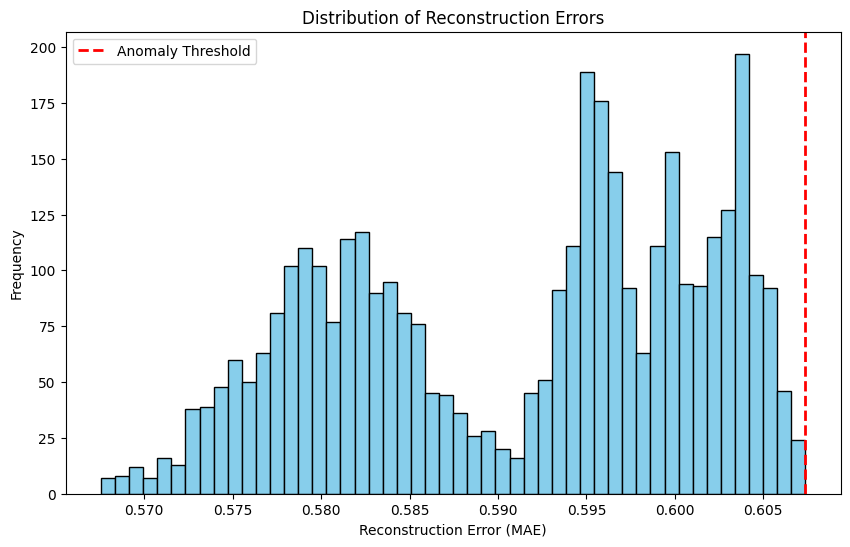

In [20]:
# Calculate the reconstruction errors for all subsequences
all_reconstruction_errors = []

for i in range(len(normal_subsequences)):
    subsequence = normal_subsequences[i].reshape(1, sequence_length, 1)
    reconstructed_subsequence = autoencoder.predict(subsequence)
    mae = np.mean(np.abs(subsequence - reconstructed_subsequence))
    all_reconstruction_errors.append(mae)

# Convert the list to a NumPy array
all_reconstruction_errors = np.array(all_reconstruction_errors)

# Retrieve the maximum value as the anomaly detection threshold
threshold = np.max(all_reconstruction_errors)

# Visualize the distribution of reconstruction errors using a histogram
plt.figure(figsize=(10, 6))
plt.hist(all_reconstruction_errors, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Reconstruction Errors')
plt.xlabel('Reconstruction Error (MAE)')
plt.ylabel('Frequency')
plt.axvline(x=threshold, color='red', linestyle='dashed', linewidth=2, label='Anomaly Threshold')
plt.legend()
plt.show()


In [21]:


# Normalize the anomalous data using the training mean and std
anomalous_data_normalized = (abnormal_data - mean_normal) / std_normal

# Function to create subsequences with a sliding window
def create_subsequences(data, sequence_length):
    subsequences = []
    for i in range(0, len(data) - sequence_length + 1):
        subsequence = data[i:i+sequence_length]
        subsequences.append(subsequence)
    return np.array(subsequences)

# Create subsequences for anomalous data
anomalous_subsequences = create_subsequences(anomalous_data_normalized, sequence_length)


In [22]:
# Function to create subsequences with a sliding window
def create_subsequences(data, sequence_length):
    subsequences = []
    for i in range(0, len(data) - sequence_length + 1):
        subsequence = data[i:i+sequence_length]
        subsequences.append(subsequence)
    return np.array(subsequences)

# Create subsequences for anomalous data
anomalous_subsequences = create_subsequences(anomalous_data_normalized, sequence_length)


In [26]:
# Reshape the anomalous subsequences to match the input shape of the model
anomalous_subsequences_reshaped = anomalous_subsequences.reshape(
    anomalous_subsequences.shape[0], sequence_length, 1
)

# Use the trained autoencoder to predict the reconstruction of anomalous subsequences
anomalous_reconstruction = autoencoder.predict(anomalous_subsequences_reshaped)


117/117 [==============================] - 1s 12ms/step


117/117 [==============================] - 3s 24ms/step


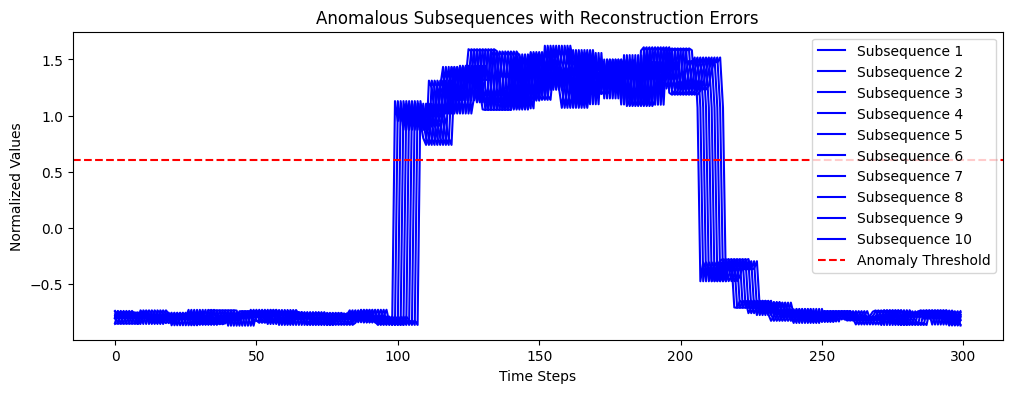

In [30]:

# Use the trained autoencoder to predict the reconstruction of anomalous subsequences
anomalous_reconstruction = autoencoder.predict(anomalous_subsequences_reshaped)

# Calculate the reconstruction errors for anomalous subsequences
anomalous_reconstruction_errors = np.mean(np.abs(anomalous_subsequences_reshaped - anomalous_reconstruction), axis=(1,2))

# Retrieve the indices of anomalous subsequences with errors greater than the threshold
anomalous_indices = np.where(anomalous_reconstruction_errors > threshold)[0]

# Visualize the anomalous subsequences with errors in red
# Visualize the anomalous subsequences with errors in red
# Visualize the anomalous subsequences with errors in red
plt.figure(figsize=(12, 4))
num_subsequences_to_plot = min(10, len(anomalous_subsequences_reshaped))  # Adjust as needed

for i in range(num_subsequences_to_plot):
    color = 'red' if i in anomalous_indices else 'blue'
    plt.plot(anomalous_subsequences_reshaped[i][:, 0], label=f'Subsequence {i + 1}', color=color)

plt.axhline(y=threshold, color='red', linestyle='dashed', label='Anomaly Threshold')
plt.title('Anomalous Subsequences with Reconstruction Errors')
plt.xlabel('Time Steps')
plt.ylabel('Normalized Values')
plt.legend()
plt.show()




In [40]:
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
import matplotlib.pyplot as plt
from scipy import signal
import os
import imageio
from IPython.display import Image

In [41]:
!wget -nc https://maxime-devanne.com/datasets/MSRAction3D/X.npy
!wget -nc https://maxime-devanne.com/datasets/MSRAction3D/Y.npy
x = np.load('X.npy')
y = np.load('Y.npy')
print(x.shape,y.shape)

File ‘X.npy’ already there; not retrieving.

File ‘Y.npy’ already there; not retrieving.

(567, 38, 60) (567,)


In [42]:
# function to create a new directory
def create_directory(directory_path):
    if os.path.exists(directory_path):
        return None
    else:
        try:
            os.makedirs(directory_path)
        except:
            # in case another machine created the path meanwhile !:(
            return None
        return directory_path

# function to plot limbs according to Kinect V1 skeleton
# parmas: Axes3D ax, X coordinates jointsX, Y coordinates jointsY, Z coordinates jointsZ
def plot_limbs(ax, jointsX, jointsY, jointsZ):
    indexes = [19, 2]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [0, 2]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [1, 2]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [0, 7]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [7, 9]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [9, 11]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [1, 8]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [8, 10]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [10, 12]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [2, 3]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [3, 6]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [4, 6]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [5, 6]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [4, 13]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [13, 15]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [15, 17]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [5, 14]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [14, 16]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')
    indexes = [16, 18]
    ax.plot(np.take(jointsX, indexes), np.take(jointsY, indexes), np.take(jointsZ, indexes), linewidth=2, color='black')


# function to show the sequence (in fact it saves all frames as images and then create a gif of the animation)
def plot_skel(x, idx_to_plot):
    seq = x[idx_to_plot]
    out_root_dir = 'out_/'
    out_pngs_dir = out_root_dir + 'pngs/' + str(idx_to_plot) + '/'
    out_gifs_dir = out_root_dir + 'gifs/'
    create_directory(out_pngs_dir)
    create_directory(out_gifs_dir)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev=23., azim=-110)
    file_names = []
    numJoints=20
    dim=3
    for i in range(0, seq.shape[0]):
        plt.cla()
        skelX = seq[i].reshape(numJoints, dim)[:, 0]
        skelY = seq[i].reshape(numJoints, dim)[:, 2]
        skelZ = seq[i].reshape(numJoints, dim)[:, 1]
        # plot joints
        ax.scatter(skelX, skelY, skelZ, c='green', depthshade=False)
        # plot limbs
        plot_limbs(ax, skelX, skelY, skelZ)
        # axes limits may have to be modified according to data (for betetr visualization)
        ax.set_xlim(-2, 2)
        ax.set_zlim(-1, 1)
        ax.set_ylim(0, 5)
        curr_file_name = str(i) + '.png'
        file_names.append(curr_file_name)
        plt.savefig(out_pngs_dir + curr_file_name)
    plt.close()
    # create the gif
    images = []
    for file_name in file_names:
        images.append(imageio.imread(out_pngs_dir + file_name))

    out_file = out_gifs_dir + str(idx_to_plot) + '.gif'
    kargs = {'duration': 0.1}
    imageio.mimsave(out_file, images, 'GIF', **kargs)

<ipython-input-42-4efd75a03c33>:90: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(out_pngs_dir + file_name))


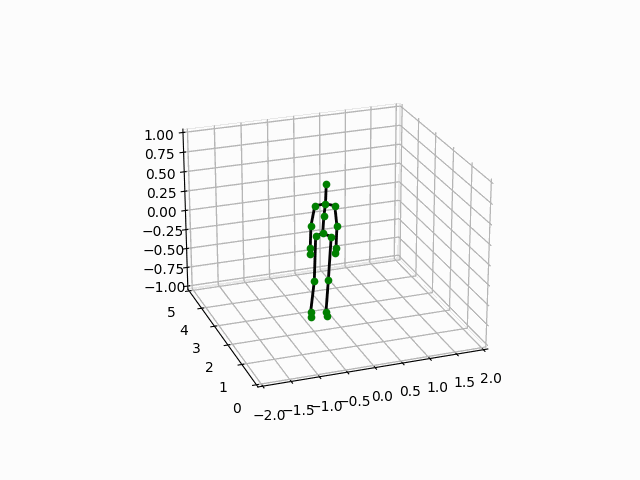

In [43]:
# plot a sequence
id_to_plot = 1
plot_skel(x, id_to_plot)
Image(open('out_/gifs/' + str(id_to_plot) + '.gif','rb').read())

In [44]:
def normalizeSkelSeq(seq):
    n_seq=seq
    min_x=np.amin(n_seq[:,:,0::3])
    min_y=np.amin(n_seq[:,:,1::3])
    min_z=np.amin(n_seq[:,:,2::3])
    max_x=np.amax(n_seq[:,:,0::3])
    max_y=np.amax(n_seq[:,:,1::3])
    max_z=np.amax(n_seq[:,:,2::3])
    n_seq[:,:,0::3]=2*((n_seq[:,:,0::3]-min_x)/(max_x-min_x))-1
    n_seq[:,:,1::3]=2*((n_seq[:,:,1::3]-min_y)/(max_y-min_y))-1
    n_seq[:,:,2::3]=2*((n_seq[:,:,2::3]-min_z)/(max_z-min_z))-1
    return n_seq

Epoch 1/50


8/8 [==============================] - 12s 70ms/step - loss: 0.0779 - val_loss: 0.0135
Epoch 2/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0111 - val_loss: 0.0048
Epoch 3/50
8/8 [==============================] - 0s 36ms/step - loss: 0.0111 - val_loss: 0.0024
Epoch 4/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0065 - val_loss: 0.0010
Epoch 5/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0024 - val_loss: 0.0010
Epoch 6/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0015 - val_loss: 6.4484e-04
Epoch 7/50
8/8 [==============================] - 0s 34ms/step - loss: 9.3344e-04 - val_loss: 4.1568e-04
Epoch 8/50
8/8 [==============================] - 0s 32ms/step - loss: 5.1344e-04 - val_loss: 3.3702e-04
Epoch 9/50
8/8 [==============================] - 0s 32ms/step - loss: 4.1602e-04 - val_loss: 2.7973e-04
Epoch 10/50
8/8 [==============================] - 0s 37ms/step - loss: 3.0031e-04 - val_loss: 2.5328e-04
Epo

<ipython-input-47-047b5bcbe108>:38: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(out_pngs_dir + file_name))


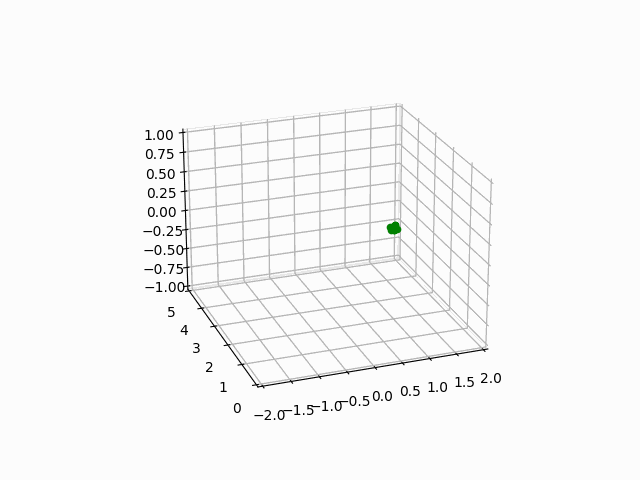

In [49]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Function to create a Variational AutoEncoder model
def create_vae(input_shape, latent_dim):
    # Encoder
    encoder_inputs = tf.keras.Input(shape=input_shape)
    x = layers.Flatten()(encoder_inputs)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dense(256, activation='relu')(x)

    # Latent space
    z_mean = layers.Dense(latent_dim, name="z_mean")(x)
    z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)

    # Reparameterization trick
    def sampling(args):
        z_mean, z_log_var = args
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

    z = layers.Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

    # Decoder
    decoder_inputs = layers.Input(shape=(latent_dim,))
    x = layers.Dense(256, activation='relu')(decoder_inputs)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dense(np.prod(input_shape), activation='sigmoid')(x)
    decoded = layers.Reshape(input_shape)(x)

    # Instantiate Encoder and Decoder models
    encoder = models.Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')
    decoder = models.Model(decoder_inputs, decoded, name='decoder')

    # Instantiate VAE model
    outputs = decoder(encoder(encoder_inputs)[2])
    vae = models.Model(encoder_inputs, outputs, name='vae')

    # Add KL divergence regularization loss
    kl_loss = -0.5 * tf.reduce_mean(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
    vae.add_loss(kl_loss)

    return vae, encoder, decoder

# Normalize the skeleton sequence
x_normalized = normalizeSkelSeq(x)

# Split the data into training and testing sets
x_train, x_test = train_test_split(x_normalized, test_size=0.1, random_state=42)

# Define input shape and latent dimension
input_shape = x_train.shape[1:]
latent_dim = 20  # Adjust this based on your requirements

# Create the VAE model
vae, encoder, decoder = create_vae(input_shape, latent_dim)

# Compile the VAE model
vae.compile(optimizer='adam')

# Train the VAE model
vae.fit(x_train, x_train, epochs=50, batch_size=64, validation_data=(x_test, x_test))

# Generate random skeleton sequences using the trained VAE
def generate_random_skeletons(num_samples=1):
    random_latent_vectors = np.random.normal(size=(num_samples, latent_dim))
    generated_skeletons = decoder.predict(random_latent_vectors)
    return generated_skeletons

# Example: Generate and plot a random skeleton sequence
generated_sequence = generate_random_skeletons()[0]
plot_skel(np.expand_dims(generated_sequence, axis=0), 0)
Image(open('out_/gifs/0.gif', 'rb').read())


In [52]:
# Normalize the entire MSR dataset
x_normalized = normalizeSkelSeq(x)

# Split the data into training and testing sets
x_train, x_test = train_test_split(x_normalized, test_size=0.1, random_state=42)

# Create the VAE model
vae, encoder, decoder = create_vae(input_shape, latent_dim)

# Compile the VAE model
vae.compile(optimizer='adam')

# Train the VAE model
vae.fit(x_train, x_train, epochs=50, batch_size=64, validation_data=(x_test, x_test))

# Generate random skeleton sequences using the trained VAE
def generate_random_skeletons(num_samples=1):
    random_latent_vectors = np.random.normal(size=(num_samples, latent_dim))
    generated_skeletons = decoder.predict(random_latent_vectors)
    return generated_skeletons

# Example: Generate and denormalize a random skeleton sequence
generated_sequence = generate_random_skeletons()[0]

# Function to denormalize a skeleton sequence
def denormalizeSkelSeq(seq, original_seq):
    min_x = np.amin(original_seq[:, :, 0::3])
    min_y = np.amin(original_seq[:, :, 1::3])
    min_z = np.amin(original_seq[:, :, 2::3])
    max_x = np.amax(original_seq[:, :, 0::3])
    max_y = np.amax(original_seq[:, :, 1::3])
    max_z = np.amax(original_seq[:, :, 2::3])

    seq_copy = seq.copy()  # Create a copy to avoid modifying the original array

    seq_copy[:, :, 0::3] = 0.5 * ((seq_copy[:, :, 0::3] + 1) * (max_x - min_x) + min_x)
    seq_copy[:, :, 1::3] = 0.5 * ((seq_copy[:, :, 1::3] + 1) * (max_y - min_y) + min_y)
    seq_copy[:, :, 2::3] = 0.5 * ((seq_copy[:, :, 2::3] + 1) * (max_z - min_z) + min_z)

    return seq_copy






# Denormalize the generated sequence
denormalized_generated_sequence = denormalizeSkelSeq(generated_sequence, x)

# Plot the denormalized generated sequence
plot_skel(np.expand_dims(denormalized_generated_sequence, axis=0), 0)
Image(open('out_/gifs/0.gif', 'rb').read())


Epoch 1/50


8/8 [==============================] - 2s 85ms/step - loss: 0.0618 - val_loss: 0.0090
Epoch 2/50
8/8 [==============================] - 0s 44ms/step - loss: 0.0084 - val_loss: 0.0032
Epoch 3/50
8/8 [==============================] - 1s 78ms/step - loss: 0.0049 - val_loss: 0.0015
Epoch 4/50
8/8 [==============================] - 1s 74ms/step - loss: 0.0025 - val_loss: 0.0011
Epoch 5/50
8/8 [==============================] - 0s 41ms/step - loss: 0.0014 - val_loss: 6.7342e-04
Epoch 6/50
8/8 [==============================] - 0s 31ms/step - loss: 7.0247e-04 - val_loss: 4.4371e-04
Epoch 7/50
8/8 [==============================] - 0s 31ms/step - loss: 5.3691e-04 - val_loss: 3.4582e-04
Epoch 8/50
8/8 [==============================] - 0s 30ms/step - loss: 4.0713e-04 - val_loss: 2.8954e-04
Epoch 9/50
8/8 [==============================] - 0s 32ms/step - loss: 3.2425e-04 - val_loss: 2.5639e-04
Epoch 10/50
8/8 [==============================] - 0s 31ms/step - loss: 2.4903e-04 - val_loss: 2.1129e

1/1 [==============================] - 0s 117ms/step


IndexError: ignored

In [58]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Function to create a Conditional Variational AutoEncoder model
def create_conditional_vae(input_shape, latent_dim, num_classes):
    # Encoder
    encoder_inputs = tf.keras.Input(shape=input_shape)
    x = layers.Flatten()(encoder_inputs)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dense(256, activation='relu')(x)

    # Class label input
    class_label = tf.keras.Input(shape=(num_classes,))

    # Concatenate class label with the encoder output
    x = layers.Concatenate()([x, class_label])

    # Continue with the encoder
    x = layers.Dense(latent_dim, activation=None)(x)  # No activation for latent space representation

    # Latent space
    z_mean = layers.Dense(latent_dim, name="z_mean")(x)
    z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)

    # Reparameterization trick
    def sampling(args):
        z_mean, z_log_var = args
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

    z = layers.Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

    # Decoder
    decoder_inputs = layers.Input(shape=(latent_dim,))
    x = layers.concatenate([decoder_inputs, class_label])  # Concatenate latent vector with class label
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dense(np.prod(input_shape), activation='sigmoid')(x)
    decoded = layers.Reshape(input_shape)(x)

    # Instantiate Encoder and Decoder models
    encoder = models.Model([encoder_inputs, class_label], [z_mean, z_log_var, z], name='encoder')
    decoder = models.Model([decoder_inputs, class_label], decoded, name='decoder')

    # Instantiate Conditional VAE model
    outputs = decoder([encoder([encoder_inputs, class_label])[2], class_label])
    vae = models.Model([encoder_inputs, class_label], outputs, name='conditional_vae')

    # Add KL divergence regularization loss
    kl_loss = -0.5 * tf.reduce_mean(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
    vae.add_loss(kl_loss)

    return vae, encoder, decoder

# Normalize the entire MSR dataset
x_normalized = normalizeSkelSeq(x)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_normalized, y, test_size=0.1, random_state=42)

# Define input shape, latent dimension, and number of classes
input_shape = x_train.shape[1:]
latent_dim = 20  # Adjust this based on your requirements
num_classes = len(np.unique(y))  # Assuming class labels are integers

# One-hot encode the class labels
y_train_one_hot = tf.one_hot(y_train, num_classes)
y_test_one_hot = tf.one_hot(y_test, num_classes)

# Create the Conditional VAE model
cvae, cencoder, cdecoder = create_conditional_vae(input_shape, latent_dim, num_classes)

# Compile the Conditional VAE model
cvae.compile(optimizer='adam')

# Train the Conditional VAE model
cvae.fit([x_train, y_train_one_hot], x_train, epochs=50, batch_size=64, validation_data=([x_test, y_test_one_hot], x_test))

# Generate random skeleton sequences for a specific class using the trained Conditional VAE
def generate_random_skeletons_for_class(class_label, num_samples=1):
    random_latent_vectors = np.random.normal(size=(num_samples, latent_dim))
    class_labels = np.full((num_samples, 1), class_label)
    generated_skeletons = cdecoder.predict([random_latent_vectors, class_labels])
    return generated_skeletons

# Example: Generate and denormalize a random skeleton sequence for a specific class
class_label_to_generate = 1  # Change this to the desired class label
generated_sequence_for_class = generate_random_skeletons_for_class(class_label_to_generate)[0]

# Denormalize the generated sequence
denormalized_generated_sequence_for_class = denormalizeSkelSeq(generated_sequence_for_class, x)

# Plot the denormalized generated sequence
plot_skel(np.expand_dims(denormalized_generated_sequence_for_class, axis=0), 0)
Image(open('out_/gifs/0.gif', 'rb').read())


Epoch 1/50


8/8 [==============================] - 4s 88ms/step - loss: 0.1864 - val_loss: 0.0279
Epoch 2/50
8/8 [==============================] - 1s 77ms/step - loss: 0.0229 - val_loss: 0.0107
Epoch 3/50
8/8 [==============================] - 1s 86ms/step - loss: 0.0134 - val_loss: 0.0073
Epoch 4/50
8/8 [==============================] - 1s 69ms/step - loss: 0.0112 - val_loss: 0.0058
Epoch 5/50
8/8 [==============================] - 0s 54ms/step - loss: 0.0073 - val_loss: 0.0039
Epoch 6/50
8/8 [==============================] - 0s 46ms/step - loss: 0.0058 - val_loss: 0.0032
Epoch 7/50
8/8 [==============================] - 0s 32ms/step - loss: 0.0052 - val_loss: 0.0030
Epoch 8/50
8/8 [==============================] - 0s 30ms/step - loss: 0.0050 - val_loss: 0.0030
Epoch 9/50
8/8 [==============================] - 0s 33ms/step - loss: 0.0040 - val_loss: 0.0027
Epoch 10/50
8/8 [==============================] - 0s 34ms/step - loss: 0.0028 - val_loss: 0.0022
Epoch 11/50
8/8 [=======================

ValueError: ignored